In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
dataset = pd.read_csv('clients.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


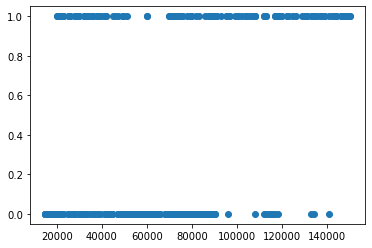

In [5]:
plt.figure()
plt.scatter(dataset['EstimatedSalary'], dataset['Purchased'])
plt.show()

In [6]:
del dataset['User ID']

In [7]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [8]:
dataset.replace({"Gender": {"Male": 1, "Female":0}}, inplace = True)

In [9]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0
...,...,...,...,...
395,0,46.0,41000.0,1
396,1,51.0,23000.0,1
397,0,50.0,20000.0,1
398,1,36.0,33000.0,0


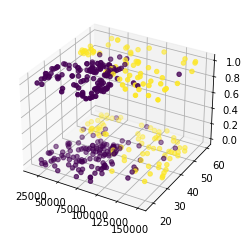

In [10]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(dataset['EstimatedSalary'], dataset['Age'], dataset['Gender'], c=dataset['Purchased']) #purchased variable catégorielle à affecter a la couleur
plt.show()

In [11]:
absence_achat = np.sum(dataset['Purchased'] == 0)/(np.sum(dataset['Purchased'] == 0) + np.sum(dataset['Purchased'] == 1))*100
absence_achat

64.25

<AxesSubplot:xlabel='Gender'>

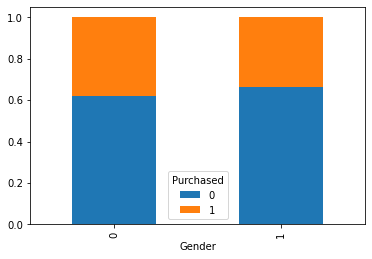

In [12]:
table= pd.crosstab(dataset['Gender'],dataset['Purchased']) #deux table croisées entre eux 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) #somme horizontale et representation verticale

In [13]:
#Il n'y a pas d'impacte concernant le genre

In [14]:
del dataset['Gender']

In [15]:
dataset

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


<AxesSubplot:xlabel='Age'>

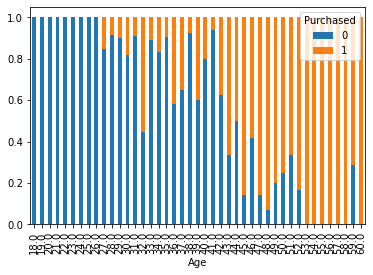

In [16]:
table= pd.crosstab(dataset['Age'],dataset['Purchased'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [17]:
#Il y a un grand impacte sur les achats en fonction de l'age
#Les gens agés achetent plus

<AxesSubplot:xlabel='EstimatedSalary'>

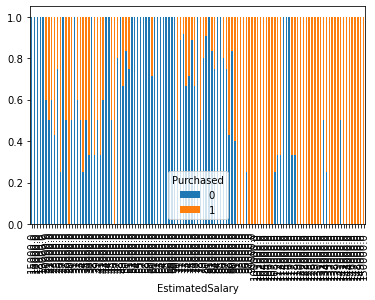

In [18]:
table= pd.crosstab(dataset['EstimatedSalary'],dataset['Purchased'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<IPython.core.display.Javascript object>


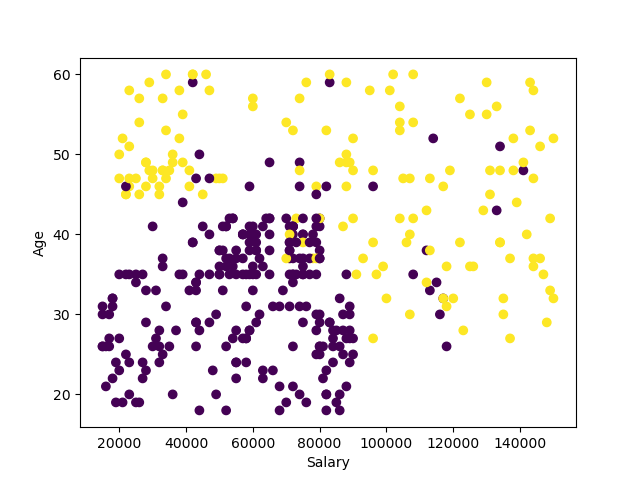

In [80]:
plt.figure()
plt.scatter(dataset['EstimatedSalary'], dataset['Age'], c=dataset['Purchased']) 
plt.ylabel('Age')
plt.xlabel('Salary')
plt.show()

In [37]:
df_x = dataset.iloc[:,:-1].values
df_y = dataset.iloc[:,-1].values

In [38]:
df_x

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

In [55]:
x_train,x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25)

In [56]:
reg = linear_model.LogisticRegression()

In [57]:
reg.fit(x_train, y_train)

LogisticRegression()

In [58]:
predict = reg.predict(x_test)

In [59]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [61]:
from sklearn.preprocessing import StandardScaler

In [77]:
norm = StandardScaler()

In [85]:
x_train1 = norm.fit_transform(x_train)
x_test1 = norm.transform(x_test)

In [86]:
reg.fit(x_train1, y_train)

LogisticRegression()

In [87]:
predict = reg.predict(x_test1)

In [88]:
predict

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [89]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [111]:
cm = metrics.confusion_matrix(y_test, predict)
cm

array([[60,  1],
       [ 9, 30]], dtype=int64)

In [114]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        61
           1       0.97      0.77      0.86        39

    accuracy                           0.90       100
   macro avg       0.92      0.88      0.89       100
weighted avg       0.91      0.90      0.90       100



In [105]:
accuracy = metrics.accuracy_score(y_test, predict)

In [106]:
accuracy

0.9

<IPython.core.display.Javascript object>


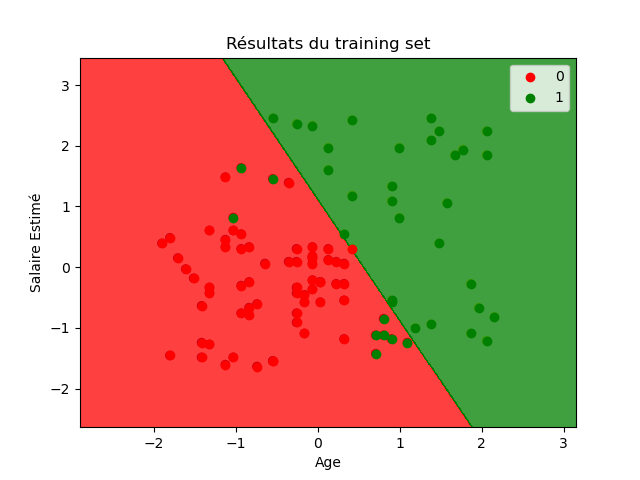

In [110]:
plt.figure()
plt.scatter(x_test1[:,0], x_test1[:,1], c=predict)
plt.show()

In [118]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test1, y_test
#
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#sparation par ligne des deux classes purchased and not purchased:
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
